# Интенсив №3

#### Работа с выбранной моделью

Установка библиотек и их импорт

In [15]:
# Установка необходимых библиотек
%pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


Note: you may need to restart the kernel to use updated packages.


Работа с данными 1

In [16]:
# Загружаем данные
train_path = "train.xlsx"
train = pd.read_excel(train_path, header=0)

# Проверяем названия столбцов
print("Столбцы train:", train.columns.tolist())

# Убираем пробелы и приводим названия к нижнему регистру
train.columns = train.columns.str.strip().str.lower()

# Переименовываем колонки в стандартные названия
column_mapping = {'dt': 'date', 'цена на арматуру': 'price'}
train.rename(columns=column_mapping, inplace=True)

# Приводим столбец 'date' к типу datetime
train['date'] = pd.to_datetime(train['date'])
train.set_index('date', inplace=True)

Столбцы train: ['dt', 'Цена на арматуру']


Работа с данными 2

In [17]:
# Разделяем данные на тренировочную и тестовую выборки (80% / 20%)
train_data, test_data = train_test_split(train, test_size=0.2, shuffle=False)

# Нормализация данных
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['price']])
test_scaled = scaler.transform(test_data[['price']])

Подготовка данных для LSTM

In [ ]:
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 30  # Размер окна для LSTM
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)


Изменение формы данных для LSTM

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Создание модели LSTM

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

c:\Users\b1gtz\Desktop\IT Projects\Python\Intensive 3\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0710 - val_loss: 0.0583
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0152 - val_loss: 0.1020
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0166 - val_loss: 0.0445
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0105 - val_loss: 0.0658
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0119 - val_loss: 0.0445
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 - val_loss: 0.0627
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0105 - val_loss: 0.0394
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0079 - val_loss: 0.0416
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0087 - val_loss: 0.0420
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0075 - val_loss: 0.0407
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0086 - val_loss: 0.0485
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0

Предсказания на тестовой выборке, оценка и визуализация предсказаний

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
LSTM Test MAE: 2983.524609375


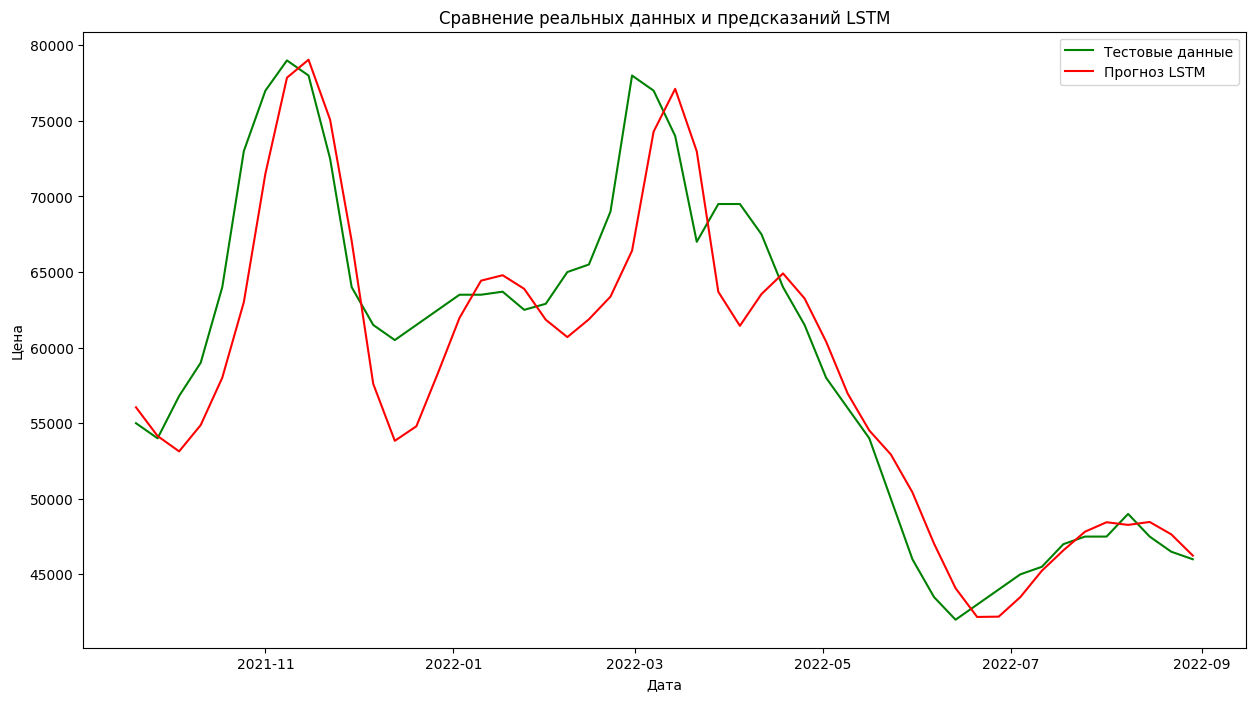

In [ ]:
# Предсказания
test_preds_lstm = model.predict(X_test)
test_preds_lstm_rescaled = scaler.inverse_transform(test_preds_lstm)  # Обратное преобразование
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Оценка модели
lstm_mae = mean_absolute_error(y_test_rescaled, test_preds_lstm_rescaled)
print(f'LSTM Test MAE: {lstm_mae}')

# Визуализация предсказаний
plt.figure(figsize=(15, 8))
plt.plot(test_data.index[time_step:], y_test_rescaled, label='Тестовые данные', color='green')
plt.plot(test_data.index[time_step:], test_preds_lstm_rescaled, label='Прогноз LSTM', color='red')
plt.title('Сравнение реальных данных и предсказаний LSTM')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

### Разложение временного ряда

Установка и импорт библиотек

In [ ]:
%pip install pandas numpy matplotlib seaborn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

Note: you may need to restart the kernel to use updated packages.


Работа с данными

In [23]:
# Загружаем данные
train_path = "train.xlsx"
train = pd.read_excel(train_path, header=0)

# Проверяем названия столбцов
print("Столбцы train:", train.columns.tolist())

# Убираем пробелы и приводим названия к нижнему регистру
train.columns = train.columns.str.strip().str.lower()

# Переименовываем колонки в стандартные названия
column_mapping = {'dt': 'date', 'цена на арматуру': 'price'}
train.rename(columns=column_mapping, inplace=True)

# Приводим столбец 'date' к типу datetime
train['date'] = pd.to_datetime(train['date'])
train.set_index('date', inplace=True)

Столбцы train: ['dt', 'Цена на арматуру']


Временной ряд

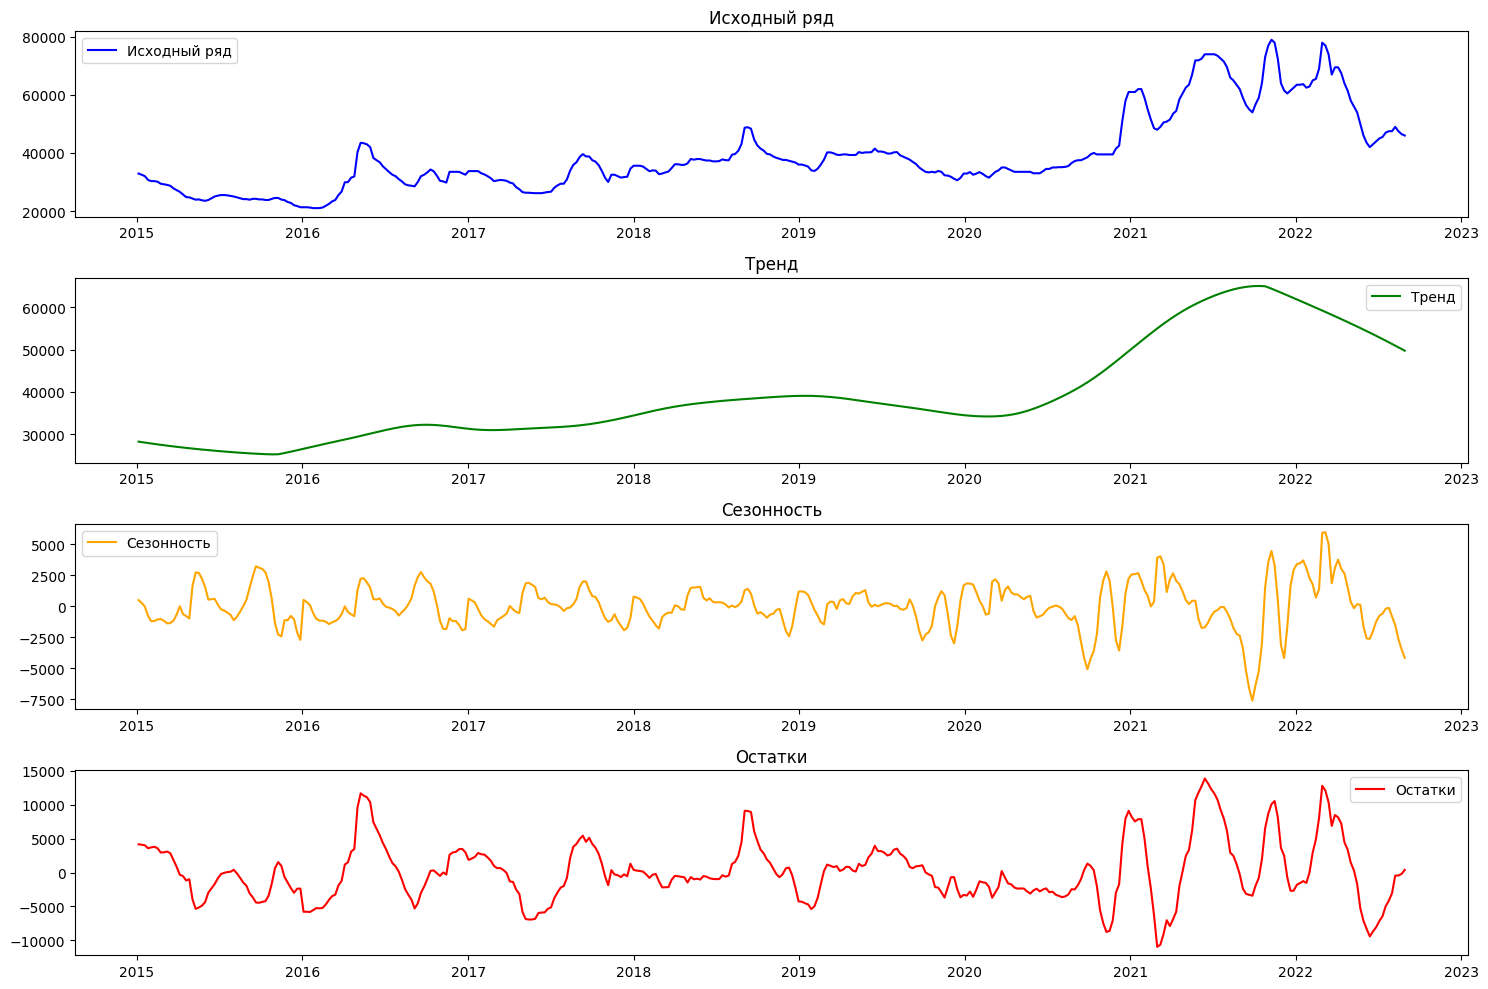

In [24]:
# Разложение временного ряда на тренд, сезонность и остатки
stl = STL(train['price'], seasonal=13)  # seasonal=13 — параметр для еженедельной сезонности
result = stl.fit()

# Извлекаем компоненты
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Визуализация разложения
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(train.index, train['price'], label='Исходный ряд', color='blue')
plt.title('Исходный ряд')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(train.index, trend, label='Тренд', color='green')
plt.title('Тренд')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(train.index, seasonal, label='Сезонность', color='orange')
plt.title('Сезонность')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(train.index, residual, label='Остатки', color='red')
plt.title('Остатки')
plt.legend()

plt.tight_layout()
plt.show()